## PART - 2

Use the index and model of part **1-b**. Apply pseudo relevance feedback assuming
top $5$ documents to be relevant. In the query updation equation for pseudo relevance
feedback, assume $\beta=1-\alpha$. Vary $\alpha$ with a step of $0.2$ between $\left[0,1\right]$, and for
each $\alpha$ value, perform the pseudo relevance feedback. Report the $\alpha$ which
maximizes the $MAP$. Does this improve the performance of the IR engine?


### Importing the required libraries

In [132]:
import numpy
import nltk
import pandas
import re

### Reading and Preprocessing the data

**Reading Data in Dataset File**

In [133]:
data = None
with open('Medical_Abstracts.txt', 'r') as f:
    data = f.read()

**Cleaning the data**

In [134]:
data = data.split('.I')[1:]

In [135]:
data = [d.split('.W')[1] for d in data]

In [136]:
# Split every line by \n
data = [d.split('\n') for d in data]

In [137]:
data[0]

['',
 'correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids .                                                           ',
 '  correlation coefficients have been determined between the levels of   ',
 'glucose and ffa in maternal and fetal plasma collected at delivery .    ',
 'significant correlations were obtained between the maternal and fetal   ',
 'glucose levels and the maternal and fetal ffa levels . from the size of ',
 'the correlation coefficients and the slopes of regression lines it      ',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at        ',
 'delivery is only slightly dependent upon the maternal level .           ',
 '']

In [138]:
data = [[d.strip() for d in d if d.strip() != ''] for d in data]

In [139]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids .',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery .',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels . from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level .']

**Preprocessing the data**

In [140]:
# Use Regex to clean all documents
data = [[re.sub(r'[^a-zA-Z0-9\s]', '', d) for d in d] for d in data]

In [141]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids ',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery ',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels  from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level ']

In [142]:
data = [[d.lower().strip() for d in d] for d in data]

In [143]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels  from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level']

--> Data Seems Good

**Tokenizing the data**

In [144]:
for d in data[0]:
    print(d.split(' '))

['correlation', 'between', 'maternal', 'and', 'fetal', 'plasma', 'levels', 'of', 'glucose', 'and', 'free']
['fatty', 'acids']
['correlation', 'coefficients', 'have', 'been', 'determined', 'between', 'the', 'levels', 'of']
['glucose', 'and', 'ffa', 'in', 'maternal', 'and', 'fetal', 'plasma', 'collected', 'at', 'delivery']
['significant', 'correlations', 'were', 'obtained', 'between', 'the', 'maternal', 'and', 'fetal']
['glucose', 'levels', 'and', 'the', 'maternal', 'and', 'fetal', 'ffa', 'levels', '', 'from', 'the', 'size', 'of']
['the', 'correlation', 'coefficients', 'and', 'the', 'slopes', 'of', 'regression', 'lines', 'it']
['appears', 'that', 'the', 'fetal', 'plasma', 'glucose', 'level', 'at', 'delivery', 'is', 'very', 'strongly']
['dependent', 'upon', 'the', 'maternal', 'level', 'whereas', 'the', 'fetal', 'ffa', 'level', 'at']
['delivery', 'is', 'only', 'slightly', 'dependent', 'upon', 'the', 'maternal', 'level']


In [145]:
# Tokenize every document
data_tokenized = []
for d in data:
    d_word_paragraph = []
    for p in d:
        d_word_paragraph.append(p.split(' '))
    data_tokenized.append(d_word_paragraph)

In [146]:
data_tokenized[0]

[['correlation',
  'between',
  'maternal',
  'and',
  'fetal',
  'plasma',
  'levels',
  'of',
  'glucose',
  'and',
  'free'],
 ['fatty', 'acids'],
 ['correlation',
  'coefficients',
  'have',
  'been',
  'determined',
  'between',
  'the',
  'levels',
  'of'],
 ['glucose',
  'and',
  'ffa',
  'in',
  'maternal',
  'and',
  'fetal',
  'plasma',
  'collected',
  'at',
  'delivery'],
 ['significant',
  'correlations',
  'were',
  'obtained',
  'between',
  'the',
  'maternal',
  'and',
  'fetal'],
 ['glucose',
  'levels',
  'and',
  'the',
  'maternal',
  'and',
  'fetal',
  'ffa',
  'levels',
  '',
  'from',
  'the',
  'size',
  'of'],
 ['the',
  'correlation',
  'coefficients',
  'and',
  'the',
  'slopes',
  'of',
  'regression',
  'lines',
  'it'],
 ['appears',
  'that',
  'the',
  'fetal',
  'plasma',
  'glucose',
  'level',
  'at',
  'delivery',
  'is',
  'very',
  'strongly'],
 ['dependent',
  'upon',
  'the',
  'maternal',
  'level',
  'whereas',
  'the',
  'fetal',
  'ffa',
  

In [147]:
final_data = []
for d in data_tokenized:
    # Merge all lists in d
    final_doc = []
    for p in d:
        final_doc.extend(p)
    final_data.append(final_doc)

In [148]:
final_data[0]

['correlation',
 'between',
 'maternal',
 'and',
 'fetal',
 'plasma',
 'levels',
 'of',
 'glucose',
 'and',
 'free',
 'fatty',
 'acids',
 'correlation',
 'coefficients',
 'have',
 'been',
 'determined',
 'between',
 'the',
 'levels',
 'of',
 'glucose',
 'and',
 'ffa',
 'in',
 'maternal',
 'and',
 'fetal',
 'plasma',
 'collected',
 'at',
 'delivery',
 'significant',
 'correlations',
 'were',
 'obtained',
 'between',
 'the',
 'maternal',
 'and',
 'fetal',
 'glucose',
 'levels',
 'and',
 'the',
 'maternal',
 'and',
 'fetal',
 'ffa',
 'levels',
 '',
 'from',
 'the',
 'size',
 'of',
 'the',
 'correlation',
 'coefficients',
 'and',
 'the',
 'slopes',
 'of',
 'regression',
 'lines',
 'it',
 'appears',
 'that',
 'the',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'at',
 'delivery',
 'is',
 'very',
 'strongly',
 'dependent',
 'upon',
 'the',
 'maternal',
 'level',
 'whereas',
 'the',
 'fetal',
 'ffa',
 'level',
 'at',
 'delivery',
 'is',
 'only',
 'slightly',
 'dependent',
 'upon',
 'the',
 'mat

**Checking Number of Documents**

In [149]:
len(final_data)

492

--> PERFECT

**Remove Stopwords**

In [150]:
# nltk.download('stopwords')

In [151]:
# Remove Stopwords using NLTK
english_stopwords = nltk.corpus.stopwords.words('english')

In [152]:
final_data = [[w for w in d if w not in english_stopwords] for d in final_data]

In [153]:
final_data[0]

['correlation',
 'maternal',
 'fetal',
 'plasma',
 'levels',
 'glucose',
 'free',
 'fatty',
 'acids',
 'correlation',
 'coefficients',
 'determined',
 'levels',
 'glucose',
 'ffa',
 'maternal',
 'fetal',
 'plasma',
 'collected',
 'delivery',
 'significant',
 'correlations',
 'obtained',
 'maternal',
 'fetal',
 'glucose',
 'levels',
 'maternal',
 'fetal',
 'ffa',
 'levels',
 '',
 'size',
 'correlation',
 'coefficients',
 'slopes',
 'regression',
 'lines',
 'appears',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'delivery',
 'strongly',
 'dependent',
 'upon',
 'maternal',
 'level',
 'whereas',
 'fetal',
 'ffa',
 'level',
 'delivery',
 'slightly',
 'dependent',
 'upon',
 'maternal',
 'level']

**Lemmatization**

In [154]:
# nltk.download('wordnet')

In [155]:
# Lemmatize using NLTK
lemmatizer = nltk.stem.WordNetLemmatizer()

In [156]:
final_data = [[lemmatizer.lemmatize(w) for w in d] for d in final_data]

In [157]:
final_data[0]

['correlation',
 'maternal',
 'fetal',
 'plasma',
 'level',
 'glucose',
 'free',
 'fatty',
 'acid',
 'correlation',
 'coefficient',
 'determined',
 'level',
 'glucose',
 'ffa',
 'maternal',
 'fetal',
 'plasma',
 'collected',
 'delivery',
 'significant',
 'correlation',
 'obtained',
 'maternal',
 'fetal',
 'glucose',
 'level',
 'maternal',
 'fetal',
 'ffa',
 'level',
 '',
 'size',
 'correlation',
 'coefficient',
 'slope',
 'regression',
 'line',
 'appears',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'delivery',
 'strongly',
 'dependent',
 'upon',
 'maternal',
 'level',
 'whereas',
 'fetal',
 'ffa',
 'level',
 'delivery',
 'slightly',
 'dependent',
 'upon',
 'maternal',
 'level']

In [158]:
# Remove '' from all documents
final_data = [[w for w in d if w != ''] for d in final_data]

In [159]:
final_data

[['correlation',
  'maternal',
  'fetal',
  'plasma',
  'level',
  'glucose',
  'free',
  'fatty',
  'acid',
  'correlation',
  'coefficient',
  'determined',
  'level',
  'glucose',
  'ffa',
  'maternal',
  'fetal',
  'plasma',
  'collected',
  'delivery',
  'significant',
  'correlation',
  'obtained',
  'maternal',
  'fetal',
  'glucose',
  'level',
  'maternal',
  'fetal',
  'ffa',
  'level',
  'size',
  'correlation',
  'coefficient',
  'slope',
  'regression',
  'line',
  'appears',
  'fetal',
  'plasma',
  'glucose',
  'level',
  'delivery',
  'strongly',
  'dependent',
  'upon',
  'maternal',
  'level',
  'whereas',
  'fetal',
  'ffa',
  'level',
  'delivery',
  'slightly',
  'dependent',
  'upon',
  'maternal',
  'level'],
 ['change',
  'nucleic',
  'acid',
  'phospholipid',
  'level',
  'liver',
  'course',
  'fetal',
  'postnatal',
  'development',
  'followed',
  'evolution',
  'dna',
  'rna',
  'pl',
  'liver',
  'rat',
  'foeti',
  'removed',
  'fifteenth',
  'twentyfirst

--> Here we now have our Data Preprocessed

In Part 1-b, we only sampled the following documents from the dataset:

[173, 124, 302, 67, 482, 241, 138, 431, 194, 412, 480, 163, 156, 386, 389, 64, 424, 434, 88, 422, 133, 131, 311, 276, 265, 324, 406, 178, 445, 341, 425, 454, 390, 40, 36, 30, 426, 46, 217, 3, 267, 437, 333, 358, 486, 74, 443, 282, 109, 371, 220, 115, 222, 197, 139, 233, 207, 84, 380, 280, 301, 94, 113, 73, 111, 444, 414, 174, 198, 387, 16, 277, 28, 421, 37, 41, 442, 59, 65, 71, 200, 203, 76, 205, 206, 82, 83, 469, 214, 343, 216, 100, 356, 365, 368, 372, 117, 376, 251, 126]

-> So we will only consider these documents for our further analysis

In [160]:
docs_to_retain = sorted([173, 124, 302, 67, 482, 241, 138, 431, 194, 412, 480, 163, 156, 386, 389, 64, 424, 434, 88, 422, 133, 131, 311, 276, 265, 324, 406, 178, 445, 341, 425, 454, 390, 40, 36, 30, 426, 46, 217, 3, 267, 437, 333, 358, 486, 74, 443, 282, 109, 371, 220, 115, 222, 197, 139, 233, 207, 84, 380, 280, 301, 94, 113, 73, 111, 444, 414, 174, 198, 387, 16, 277, 28, 421, 37, 41, 442, 59, 65, 71, 200, 203, 76, 205, 206, 82, 83, 469, 214, 343, 216, 100, 356, 365, 368, 372, 117, 376, 251, 126])

print(docs_to_retain)

# Remove all documents except the ones in docs_to_retain
final_data = [final_data[i] for i in docs_to_retain]

# This will change the index of the documents
# Hence, we need an index to document mapping
index_to_doc = {i: d for i, d in enumerate(docs_to_retain)}
doc_to_index = {d: i for i, d in enumerate(docs_to_retain)}

[3, 16, 28, 30, 36, 37, 40, 41, 46, 59, 64, 65, 67, 71, 73, 74, 76, 82, 83, 84, 88, 94, 100, 109, 111, 113, 115, 117, 124, 126, 131, 133, 138, 139, 156, 163, 173, 174, 178, 194, 197, 198, 200, 203, 205, 206, 207, 214, 216, 217, 220, 222, 233, 241, 251, 265, 267, 276, 277, 280, 282, 301, 302, 311, 324, 333, 341, 343, 356, 358, 365, 368, 371, 372, 376, 380, 386, 387, 389, 390, 406, 412, 414, 421, 422, 424, 425, 426, 431, 434, 437, 442, 443, 444, 445, 454, 469, 480, 482, 486]


In [161]:
index_to_doc

{0: 3,
 1: 16,
 2: 28,
 3: 30,
 4: 36,
 5: 37,
 6: 40,
 7: 41,
 8: 46,
 9: 59,
 10: 64,
 11: 65,
 12: 67,
 13: 71,
 14: 73,
 15: 74,
 16: 76,
 17: 82,
 18: 83,
 19: 84,
 20: 88,
 21: 94,
 22: 100,
 23: 109,
 24: 111,
 25: 113,
 26: 115,
 27: 117,
 28: 124,
 29: 126,
 30: 131,
 31: 133,
 32: 138,
 33: 139,
 34: 156,
 35: 163,
 36: 173,
 37: 174,
 38: 178,
 39: 194,
 40: 197,
 41: 198,
 42: 200,
 43: 203,
 44: 205,
 45: 206,
 46: 207,
 47: 214,
 48: 216,
 49: 217,
 50: 220,
 51: 222,
 52: 233,
 53: 241,
 54: 251,
 55: 265,
 56: 267,
 57: 276,
 58: 277,
 59: 280,
 60: 282,
 61: 301,
 62: 302,
 63: 311,
 64: 324,
 65: 333,
 66: 341,
 67: 343,
 68: 356,
 69: 358,
 70: 365,
 71: 368,
 72: 371,
 73: 372,
 74: 376,
 75: 380,
 76: 386,
 77: 387,
 78: 389,
 79: 390,
 80: 406,
 81: 412,
 82: 414,
 83: 421,
 84: 422,
 85: 424,
 86: 425,
 87: 426,
 88: 431,
 89: 434,
 90: 437,
 91: 442,
 92: 443,
 93: 444,
 94: 445,
 95: 454,
 96: 469,
 97: 480,
 98: 482,
 99: 486}

In [162]:
doc_to_index

{3: 0,
 16: 1,
 28: 2,
 30: 3,
 36: 4,
 37: 5,
 40: 6,
 41: 7,
 46: 8,
 59: 9,
 64: 10,
 65: 11,
 67: 12,
 71: 13,
 73: 14,
 74: 15,
 76: 16,
 82: 17,
 83: 18,
 84: 19,
 88: 20,
 94: 21,
 100: 22,
 109: 23,
 111: 24,
 113: 25,
 115: 26,
 117: 27,
 124: 28,
 126: 29,
 131: 30,
 133: 31,
 138: 32,
 139: 33,
 156: 34,
 163: 35,
 173: 36,
 174: 37,
 178: 38,
 194: 39,
 197: 40,
 198: 41,
 200: 42,
 203: 43,
 205: 44,
 206: 45,
 207: 46,
 214: 47,
 216: 48,
 217: 49,
 220: 50,
 222: 51,
 233: 52,
 241: 53,
 251: 54,
 265: 55,
 267: 56,
 276: 57,
 277: 58,
 280: 59,
 282: 60,
 301: 61,
 302: 62,
 311: 63,
 324: 64,
 333: 65,
 341: 66,
 343: 67,
 356: 68,
 358: 69,
 365: 70,
 368: 71,
 371: 72,
 372: 73,
 376: 74,
 380: 75,
 386: 76,
 387: 77,
 389: 78,
 390: 79,
 406: 80,
 412: 81,
 414: 82,
 421: 83,
 422: 84,
 424: 85,
 425: 86,
 426: 87,
 431: 88,
 434: 89,
 437: 90,
 442: 91,
 443: 92,
 444: 93,
 445: 94,
 454: 95,
 469: 96,
 480: 97,
 482: 98,
 486: 99}

### Building an Inverted Index

In [163]:
# Inverted Index
inv_index = {}

In [164]:
for i in range(len(final_data)):
    for w in set(final_data[i]):
        if w not in inv_index:
            inv_index[w] = [i]
        else:
            inv_index[w].append(i)

In [165]:
len(inv_index)

3338

In [166]:
list(inv_index.keys())[:10]

['4',
 '212',
 'live',
 'studied',
 'death',
 'cholesterol',
 'includes',
 'stillborn',
 'fraction',
 'accompany']

In [167]:
try:
    inv_index.pop('')
except:
    pass

In [168]:
inv_index['cancer']

[11, 45, 46, 51, 66, 80, 91, 92, 93, 94]

In [169]:
# Save the inverted index to a pickle file
import pickle

with open('inv_index.pickle_part2', 'wb') as f:
    pickle.dump(inv_index, f)

Seems about right!

### TF-IDF Model that we used Before

We will use the Augmented TF-IDF model for this task. The Augmented TF-IDF model is a variant of the TF-IDF model which takes into account the length of the document. The formula for the Augmented TF-IDF model is given below:

$$TF(t, d) = 0.5 + \dfrac{0.5 \times f(t, d)}{\text{max-frequency of any word in } d}$$

$$IDF(t) = \log \left(\dfrac{\text{Number of Docs}}{df(t)}\right)$$

### Pseudo Relevance Feedback

In pseudo relevance feedback, we will assume that the top $5$ documents are relevant to the query. We then update the query using the following equation:

$$q' = \alpha \times q + (1 - \alpha) \times \dfrac{\sum_{i=1}^{5} d_i}{5}$$

where $q$ is the original query, $d_i$ is the $i^{th}$ relevant document, and $\alpha$ is a parameter which we will vary between $0$ and $1$ with a step of $0.2$. 

We will then use the updated query to find the top $k$ documents.

**Implementing the Model**

In [170]:
import scipy

class TfIdfModel:
    
    def __init__(self, inv_index, data):

        self.inv_index = inv_index.copy()
        self.data = data.copy()
        
        self.num_docs = len(self.data)
        
        # Calculate the document frequency for each word
        self.doc_freq = {}
        for w in self.inv_index:
            self.doc_freq[w] = len(self.inv_index[w])
        
        # Calculate the Term-Doc Frequencies
        self.term_doc_freq = {}
        for i in range(self.num_docs):

            self.term_doc_freq[i] = {}
            
            # Initialize all values to 0
            for w in self.inv_index:
                self.term_doc_freq[i][w] = 0
            
            # Calculate the term frequency for each word in the document
            for w in self.data[i]:
                self.term_doc_freq[i][w] += 1
        
        # Calculate Maximum Term Frequency for each document
        self.max_term_freq = {}
        
        for i in range(self.num_docs):
            self.max_term_freq[i] = max(self.term_doc_freq[i].values())
        
        # Calculate the TF-IDF for each word in each document
        self.tf_idf = {}

        for i in range(self.num_docs):

            self.tf_idf[i] = {}
            
            for w in self.inv_index:
                # Augmented Variant of TF-IDF
                TF = (0.5 + 0.5 * (self.term_doc_freq[i][w] / self.max_term_freq[i]))
                IDF = numpy.log(self.num_docs / self.doc_freq[w])
                self.tf_idf[i][w] = TF * IDF

    def get_tf_idf(self, word, doc_id):
        return self.tf_idf[doc_id][word]
    
    def get_feature_vector_by_id(self, doc_id):
        return [self.tf_idf[doc_id][w] for w in self.inv_index]

    def get_query_vector(self, query):
        query_vector = []
        for w in self.inv_index:
            if w in query:
                # Find TF of w
                tf = query.count(w)
                tf = 0.5 + 0.5 * (tf / max([query.count(q) for q in query]))
                # Find IDF of w
                idf = numpy.log(self.num_docs / self.doc_freq[w])
                query_vector.append(tf * idf)
            else:
                query_vector.append(0)
        return numpy.array(query_vector)
    
    def get_top_k_docs(self, query, k):
        query_vector = self.get_query_vector(query)
        scores = []
        for i in range(self.num_docs):
            doc_vector = self.get_feature_vector_by_id(i)
            scores.append((i, 1 - scipy.spatial.distance.cosine(query_vector, doc_vector)))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        return scores[:k]
    
    def get_top_k_docs_using_query_vector(self, query_vector, k):
        scores = []
        for i in range(self.num_docs):
            doc_vector = self.get_feature_vector_by_id(i)
            scores.append((i, 1 - scipy.spatial.distance.cosine(query_vector, doc_vector)))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        return scores[:k]

    # Implementing Pseudo Relevance Feedback
    def get_top_k_with_prf(self, query, k, alpha=0.5, num_rounds=10):

        beta = 1 - alpha
        
        query_vector = self.get_query_vector(query)
        
        for i in range(num_rounds):
 
            # Get the top 5 documents
            top_docs = self.get_top_k_docs_using_query_vector(query_vector, 5)
            
            # Mean of the top 5 documents
            mean_vector = numpy.mean([self.get_feature_vector_by_id(d[0]) for d in top_docs], axis=0)
            
            # New Query Vector
            query_vector = alpha * query_vector + beta * mean_vector
            
        return self.get_top_k_docs_using_query_vector(query_vector, k)


In [171]:
# Build the TF-IDF Model
TF_IDF_Model = TfIdfModel(inv_index, final_data)

Checking the Model Results

In [172]:
# Query the TF-IDF Model
query = ['cancer', 'tumor', 'treatment']

In [173]:
query_vector = TF_IDF_Model.get_query_vector(query)

In [174]:
len(query_vector)

3338

In [175]:
# Get the top 10 documents for the query
op = TF_IDF_Model.get_top_k_docs(query, 10)
op2 = TF_IDF_Model.get_top_k_with_prf(query, 10, alpha=0.5, num_rounds=10)

In [176]:
op

[(46, 0.02464771814997102),
 (91, 0.022400250718890846),
 (94, 0.02237231574587273),
 (74, 0.02141851991327437),
 (81, 0.02098862027171955),
 (92, 0.0208728343056942),
 (36, 0.020712319741944207),
 (99, 0.019809705190194538),
 (66, 0.019771720269466164),
 (1, 0.019563132434868624)]

In [177]:
op2

[(45, 0.9998966007797812),
 (41, 0.9998648434943622),
 (97, 0.9998479658676662),
 (80, 0.9998283698355971),
 (66, 0.9997923146827048),
 (90, 0.9997663116578952),
 (5, 0.9997583950151281),
 (55, 0.9997257597134839),
 (34, 0.9997181153651659),
 (6, 0.9997083331258043)]

Reversing the Index-Change that happened due to Sampling

In [178]:
[index_to_doc[o[0]] for o in op]

[207, 442, 445, 376, 412, 443, 173, 486, 341, 16]

In [179]:
[index_to_doc[o[0]] for o in op2]

[206, 198, 480, 406, 341, 437, 37, 265, 156, 40]

### Defining Queries

In [180]:
QUERIES={}
QUERIES['constipation']=[[203,251,372],[203,372],[203,251,372,442]]
QUERIES['influenza']=[[59],[59,469],[59,71,469]]
QUERIES['cough']=[[372,421],[372,83,126,],[372,83,126,421]]
QUERIES['muscle ache']=[[37,65,76,126,343],[37,65,76,117,126,387],[37,65,76,83,100,117,126,206,277,343]]
QUERIES['vomiting']=[[203,442],[203,372,442],[203,372,442]]
QUERIES['hepatitis']=[[16,376],[16,376],[16,368,376]]
QUERIES['diarrhea']=[[372,442],[372,203,372,442],[372,203,372,442]]
QUERIES['cold']=[[83,126,421],[82,83,126,421],[41,82,83,126]]
QUERIES['paracetamol ibuprofen']=[[216,200],[216,200,365,356],[216,200,205,356,214]]
QUERIES['common cold']=[[83,126,421,372,28,365],[82,83,126,421,372,28],[41,82,83,126]]
QUERIES['paracetamol']=[[28,214,364,83,126,421,372,28,365],[28,214,364,421,372,28],[28,214,364,41,82,83,126]]
QUERIES['ibuprofen']=[[200,139,216],[200,356,139,216],[200,205,216]]
QUERIES['fever']=[[28,214,365,251],[28,214,365,251],[28,214,365]]
QUERIES['virus']=[[275,372,399,402,403,59,71,371],[275,372,399,400,402,403,475,59,71],[275,372,400,403,475,71,371]]
QUERIES['hepatitis virus']=[[368,376,16,401],[368,376,16,399,401,402],[368,376,16,372,399,402]]
QUERIES['sore throat']=[[477,483,71,177,214,252],[477,483,71,177,198,214],[477,71,177,198]]
QUERIES['headache']=[[216,421,214,28,83,126,421,372,28,365,61,69,71],[216,421,214,365,28,82,83,126,421,372,28,61,62,69,71],[216,421,365,28,41,82,83,126,61,62,71]]
QUERIES['back pain']=[[378,162,301,235,413,356],[378,162,235,301,235,348,356],[378,235,301,235,356]]
QUERIES['stomach ache']=[[391,372,442],[391,200,372,203,372,442],[391,200,372,203,372,442]]
QUERIES['nausea']=[[368,442,203,442],[368,442,203,372,442],[368,442,203,372,442]]

# Taking Union
for i in QUERIES:
    QUERIES[i]=list(set(QUERIES[i][0]+QUERIES[i][1]+QUERIES[i][2]))

In [181]:
QUERIES

{'constipation': [442, 203, 372, 251],
 'influenza': [59, 469, 71],
 'cough': [83, 372, 421, 126],
 'muscle ache': [65, 387, 100, 37, 76, 206, 83, 117, 277, 343, 126],
 'vomiting': [442, 203, 372],
 'hepatitis': [16, 376, 368],
 'diarrhea': [442, 203, 372],
 'cold': [421, 41, 82, 83, 126],
 'paracetamol ibuprofen': [356, 200, 205, 365, 214, 216],
 'common cold': [421, 41, 365, 82, 83, 372, 28, 126],
 'paracetamol': [421, 41, 364, 365, 82, 83, 372, 214, 28, 126],
 'ibuprofen': [356, 200, 139, 205, 216],
 'fever': [251, 28, 365, 214],
 'virus': [71, 399, 400, 402, 275, 372, 403, 371, 475, 59],
 'hepatitis virus': [399, 368, 16, 401, 402, 372, 376],
 'sore throat': [483, 198, 71, 177, 214, 252, 477],
 'headache': [421, 69, 71, 41, 365, 82, 83, 372, 214, 216, 62, 28, 61, 126],
 'back pain': [162, 356, 235, 301, 378, 348, 413],
 'stomach ache': [391, 200, 203, 372, 442],
 'nausea': [368, 442, 203, 372]}

In [182]:
# Subtract 1 from all doc_ids in queries
# for i in QUERIES:
#     QUERIES[i]=[x-1 for x in QUERIES[i]]

In [183]:
QUERIES

{'constipation': [442, 203, 372, 251],
 'influenza': [59, 469, 71],
 'cough': [83, 372, 421, 126],
 'muscle ache': [65, 387, 100, 37, 76, 206, 83, 117, 277, 343, 126],
 'vomiting': [442, 203, 372],
 'hepatitis': [16, 376, 368],
 'diarrhea': [442, 203, 372],
 'cold': [421, 41, 82, 83, 126],
 'paracetamol ibuprofen': [356, 200, 205, 365, 214, 216],
 'common cold': [421, 41, 365, 82, 83, 372, 28, 126],
 'paracetamol': [421, 41, 364, 365, 82, 83, 372, 214, 28, 126],
 'ibuprofen': [356, 200, 139, 205, 216],
 'fever': [251, 28, 365, 214],
 'virus': [71, 399, 400, 402, 275, 372, 403, 371, 475, 59],
 'hepatitis virus': [399, 368, 16, 401, 402, 372, 376],
 'sore throat': [483, 198, 71, 177, 214, 252, 477],
 'headache': [421, 69, 71, 41, 365, 82, 83, 372, 214, 216, 62, 28, 61, 126],
 'back pain': [162, 356, 235, 301, 378, 348, 413],
 'stomach ache': [391, 200, 203, 372, 442],
 'nausea': [368, 442, 203, 372]}

### Checking Results for Different Values of $\alpha$

**Implementing functions to calculate Average Precision and MAP**

In [184]:
def get_precision(actual, predicted):
    return len(set(actual) & set(predicted))/len(predicted)

def get_ap(actual, predicted):
    return sum([get_precision(actual, predicted[:i+1]) for i in range(len(predicted))])/len(predicted)

In [185]:
def get_MAP(method_results, QUERIES):
    
    MAP = 0

    for i in QUERIES:

        AP = 0
        
        for j in method_results[i]:
            AP += (get_ap(QUERIES[i], j))
            
        AP /= len(method_results[i])
        
        MAP += AP

    MAP /= len(QUERIES)
    
    return MAP

**Calculating MAP for different values of $\alpha$**

In [186]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

map_dict = {}

for alpha in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    
    res = {}
    
    print("Alpha = ", alpha)

    for i in QUERIES:
        
        q = lemmatizer.lemmatize(i)
        
        res[i] = []

        for j in range(10):

            output = TF_IDF_Model.get_top_k_with_prf(q.split(), 10, alpha=alpha, num_rounds=1)

            # Take only 0th index of the output
            output = [o[0] for o in output]

            # Get Real DOC_ID
            output = [index_to_doc[o] for o in output]
            
            res[i].append(output)
    
    MAP = get_MAP(res, QUERIES)

    print("MAP for alpha = ", alpha, " is ", MAP)

    map_dict[alpha] = MAP

Alpha =  0.0
MAP for alpha =  0.0  is  0.03691269841269841
Alpha =  0.2
MAP for alpha =  0.2  is  0.03691269841269841
Alpha =  0.4
MAP for alpha =  0.4  is  0.032996031746031745
Alpha =  0.6
MAP for alpha =  0.6  is  0.03645238095238096
Alpha =  0.8
MAP for alpha =  0.8  is  0.051035714285714275
Alpha =  1.0
MAP for alpha =  1.0  is  0.07493055555555554


**Plotting the MAP values vs $\alpha$**

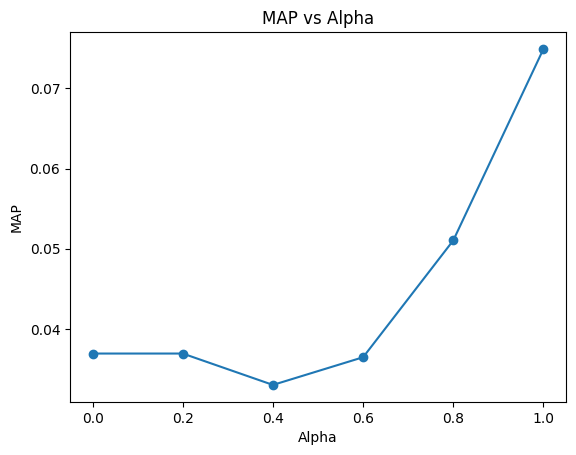

In [187]:
import matplotlib.pyplot as plt

# Plotting the MAP vs Alpha
plt.plot(list(map_dict.keys()), list(map_dict.values()))
plt.scatter(list(map_dict.keys()), list(map_dict.values()))

plt.xlabel("Alpha")
plt.ylabel("MAP")

plt.title("MAP vs Alpha")

plt.show()

**Checking the value of $\alpha$ which maximizes MAP**

In [188]:
map_dict

{0.0: 0.03691269841269841,
 0.2: 0.03691269841269841,
 0.4: 0.032996031746031745,
 0.6: 0.03645238095238096,
 0.8: 0.051035714285714275,
 1.0: 0.07493055555555554}

In [189]:
# Get Alpha with the highest MAP
print("Alpha with the highest MAP is ", max(map_dict, key=map_dict.get), " with MAP = ", map_dict[max(map_dict, key=map_dict.get)])

Alpha with the highest MAP is  1.0  with MAP =  0.07493055555555554


**On comparing MAP with the Model in Part-1b, we can say that this has improved the performance of the IR engine. The value of $\alpha$ which maximizes MAP is $\alpha=1.0$.**

## Part 3:

Use query expansion by adding maximum two synonyms of the nouns and verbs
present in the query. Search the synonyms from NLTK Wordnet. Compare the
performance with the models in Part 1-b and Part 2.

**Implementing Query Expansion**

In [190]:
# Import NLTK wordnet
import nltk
from nltk.corpus import wordnet

In [191]:
# For Tagging
# nltk.download('averaged_perceptron_tagger')

In [192]:
# Function to Expand the Query
def expand_query(q):
    
    # adding maximum two synonyms of the nouns and verbs present in the query. Search the synonyms from NLTK Wordnet
    # add the synonyms to the query
    # return the expanded query
    new_q = []
    
    for i in q:
        
        new_q.append(i)
        
        # Check if the word is a noun or verb
        if not nltk.pos_tag([i])[0][1] in ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
            continue
        
        # print(i, "is a noun or verb")
        
        # Check if the word is present in wordnet
        if not wordnet.synsets(i):
            continue
        
        # print(i, "is present in wordnet")
        
        # Get the synonyms
        synonyms = wordnet.synsets(i)[0].lemma_names()
        # print("Synonyms of ", i, " are ", synonyms)
        
        # Add max 2 synonyms to the query
        cnt = 0
        for j in synonyms:
            
            if j == i:
                continue
            
            new_q.append(j)

            cnt += 1
            if cnt == 2:
                break
        
    return new_q

In [193]:
# Query Expansion
query = ['cancer', 'tumor', 'treatment']

# Expand the query
new_query = expand_query(query)

In [194]:
print("Expanded Query is ", new_query)

Expanded Query is  ['cancer', 'malignant_neoplastic_disease', 'tumor', 'tumour', 'neoplasm', 'treatment', 'intervention']


#### **Comparing the Performance of the Models**

We will re-calculating the MAP values for the models in Part 1-b and Part 2 using Updated Queries after Query Expansion.

**Creating Updated Queries**

In [195]:
# Let us Update the QUERIES

new_QUERIES = {}

for q in QUERIES:
    
    new_q = expand_query(q.split())
    
    new_QUERIES[' '.join(new_q)] = QUERIES[q]

In [196]:
new_QUERIES

{'constipation irregularity': [442, 203, 372, 251],
 'influenza flu grippe': [59, 469, 71],
 'cough coughing': [83, 372, 421, 126],
 'muscle musculus ache aching': [65,
  387,
  100,
  37,
  76,
  206,
  83,
  117,
  277,
  343,
  126],
 'vomiting vomit emesis': [442, 203, 372],
 'hepatitis': [16, 376, 368],
 'diarrhea diarrhoea looseness_of_the_bowels': [442, 203, 372],
 'cold common_cold': [421, 41, 82, 83, 126],
 'paracetamol ibuprofen isobutylphenyl_propionic_acid Advil': [356,
  200,
  205,
  365,
  214,
  216],
 'common cold common_cold': [421, 41, 365, 82, 83, 372, 28, 126],
 'paracetamol': [421, 41, 364, 365, 82, 83, 372, 214, 28, 126],
 'ibuprofen isobutylphenyl_propionic_acid Advil': [356, 200, 139, 205, 216],
 'fever febrility febricity': [251, 28, 365, 214],
 'virus': [71, 399, 400, 402, 275, 372, 403, 371, 475, 59],
 'hepatitis virus': [399, 368, 16, 401, 402, 372, 376],
 'sore throat pharynx': [483, 198, 71, 177, 214, 252, 477],
 'headache concern worry': [421,
  69,
  71

**Comparing with Models in Part-2**

In [197]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

map_dict_QE = {}

for alpha in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    
    res = {}
    
    print("Alpha = ", alpha)

    for i in new_QUERIES:
        
        q = lemmatizer.lemmatize(i)
        
        res[i] = []

        for j in range(10):

            output = TF_IDF_Model.get_top_k_with_prf(q.split(), 10, alpha=alpha, num_rounds=1)

            # Take only 0th index of the output
            output = [o[0] for o in output]

            # Get Real DOC_ID
            output = [index_to_doc[o] for o in output]
            
            res[i].append(output)
    
    MAP = get_MAP(res, new_QUERIES)

    print("MAP for alpha = ", alpha, " is ", MAP)

    map_dict_QE[alpha] = MAP

Alpha =  0.0
MAP for alpha =  0.0  is  0.03691269841269841
Alpha =  0.2
MAP for alpha =  0.2  is  0.03691269841269841
Alpha =  0.4
MAP for alpha =  0.4  is  0.032996031746031745
Alpha =  0.6
MAP for alpha =  0.6  is  0.03645238095238096
Alpha =  0.8
MAP for alpha =  0.8  is  0.051035714285714275
Alpha =  1.0
MAP for alpha =  1.0  is  0.06610515873015872


**Plotting the Comparison**

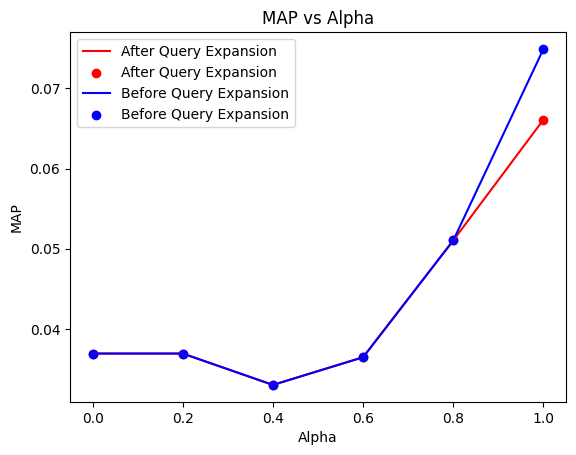

In [198]:
import matplotlib.pyplot as plt

# Plotting the MAP vs Alpha
plt.plot(list(map_dict_QE.keys()), list(map_dict_QE.values()), color='red', label="After Query Expansion")
plt.scatter(list(map_dict_QE.keys()), list(map_dict_QE.values()), color='red', label="After Query Expansion")

plt.plot(list(map_dict.keys()), list(map_dict.values()), color='blue', label="Before Query Expansion")
plt.scatter(list(map_dict.keys()), list(map_dict.values()), color='blue', label="Before Query Expansion")

plt.xlabel("Alpha")
plt.ylabel("MAP")

plt.title("MAP vs Alpha")
plt.legend()

plt.show()

**Comparing with Models in Part 1-b**

In [199]:
res_QE = {}
res = {}

for i in new_QUERIES:
    
    q = lemmatizer.lemmatize(i)
    
    res_QE[i] = []

    for j in range(10):

        output = TF_IDF_Model.get_top_k_docs(q.split(), 10)

        # Take only 0th index of the output
        output = [o[0] for o in output]

        # Get Real DOC_ID
        output = [index_to_doc[o] for o in output]
        
        res_QE[i].append(output)

for i in QUERIES:
    
    q = lemmatizer.lemmatize(i)
    
    res[i] = []

    for j in range(10):

        output = TF_IDF_Model.get_top_k_docs(q.split(), 10)

        # Take only 0th index of the output
        output = [o[0] for o in output]

        # Get Real DOC_ID
        output = [index_to_doc[o] for o in output]
        
        res[i].append(output)

MAP_QE = get_MAP(res_QE, new_QUERIES)
MAP = get_MAP(res, QUERIES)

print("MAP for Model in Part 1-b with Query Expansion is ", MAP_QE)
print("MAP for Model in Part 1-b without Query Expansion is ", MAP)

MAP for Model in Part 1-b with Query Expansion is  0.06610515873015872
MAP for Model in Part 1-b without Query Expansion is  0.07493055555555554


**Plotting the Comparison**

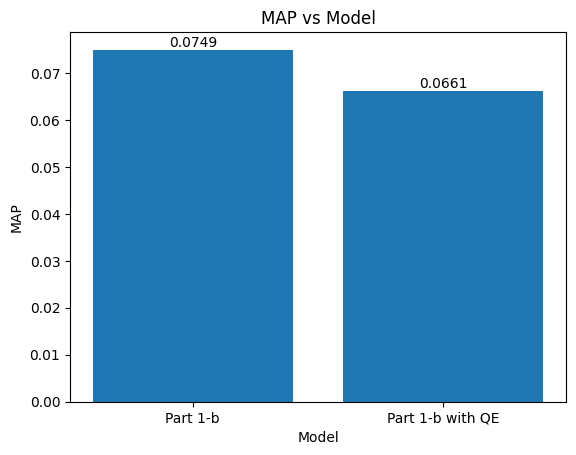

In [200]:
x = ['Part 1-b', 'Part 1-b with QE']
y = [MAP, MAP_QE]

plt.bar(x, y)

plt.xlabel("Model")
plt.ylabel("MAP")

# Write Values on the Bar
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]:.4f}', ha='center', va='bottom')

plt.title("MAP vs Model")

plt.show()